### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
# your code and solutions
import pandas as pd
df = pd.read_csv("/content/The E-commerce Dataset.csv")
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [2]:
df['gender'].unique()

array(['F', 'M', nan], dtype=object)

### Removing Null Values


In [3]:
df.dropna(subset=['gender'], inplace=True)

df.dropna(subset=['rating'], inplace=True)
df.dropna(subset=['helpfulness'], inplace=True)
df['gender'].unique()
df['rating'].unique()


array([5., 1., 4., 2., 3.])

### Removing rows with Review == 'none'

In [4]:
df = df[df['review']!= 'none']

len(df)

19916

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


#### Q2.1 total number of unique users, unique reviews, unique items, and unique categories

In [5]:
# your code and solutions
print(str(len(df['userId'].unique())) + ' unique users')
print(str(len(df['review'].unique())) + ' unique reviews')
print(str(len(df['item_id'].unique())) + ' unique items')
print(str(len(df['category'].unique())) + ' unique categories')

8562 unique users
19459 unique reviews
89 unique items
9 unique categories


#### Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

In [6]:

df['rating'].describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders

In [7]:
df.groupby('gender')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,9793.0,3.717451,1.395355,1.0,3.0,4.0,5.0,5.0
M,10123.0,3.686654,1.413098,1.0,3.0,4.0,5.0,5.0


Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [8]:
df.groupby('item')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
AOL (America Online),939.0,2.500532,1.368528,1.0,1.00,2.0,4.0,5.0
All Advantage,657.0,3.412481,1.541706,1.0,2.00,4.0,5.0,5.0
Alta Vista (by 1stUp),157.0,3.541401,1.263341,1.0,3.00,4.0,4.0,5.0
Amazon.com,240.0,3.683333,1.571095,1.0,2.00,4.0,5.0,5.0
American Airlines,185.0,3.054054,1.417015,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Wendy's,210.0,3.971429,1.093322,1.0,3.25,4.0,5.0,5.0
What Lies Beneath,160.0,3.450000,1.201676,1.0,3.00,3.5,4.0,5.0
X-Men,245.0,4.118367,0.853074,1.0,4.00,4.0,5.0,5.0


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

<Axes: title={'center': 'rating'}, xlabel='gender'>

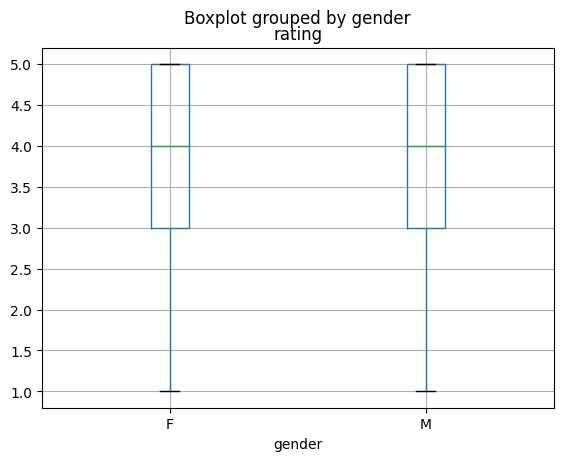

In [9]:
# your code and solutions

df.boxplot(column='rating', by='gender')


In [10]:
male = df[df['gender']== 'M']
female = df[df['gender']== 'F']
print(len(male))
print(len(male[male['rating']>=3]))
print(len(female))
print(len(female[female['rating']>=3]))

10123
7725
9793
7570


###  For both genders, most of the ratings are greater than 3. Therefore, gender does not have a strong relation with rating.

<Axes: title={'center': 'rating'}, xlabel='helpfulness'>

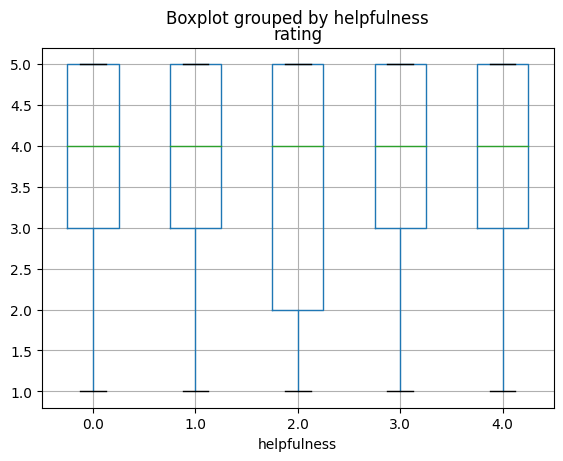

In [11]:
df.boxplot(column='rating', by='helpfulness')

Except for helpfulness value of 2.0, all the other values tend to have ratings between 3 to 5 in most of the cases. So, a clear relation cannot be found in this case as well.

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Books'),
  Text(2, 0, 'Games'),
  Text(3, 0, 'Hotels & Travel'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Media'),
  Text(6, 0, 'Movies'),
  Text(7, 0, 'Online Stores & Services'),
  Text(8, 0, 'Personal Finance'),
  Text(9, 0, 'Restaurants & Gourmet')])

<Figure size 1200x800 with 0 Axes>

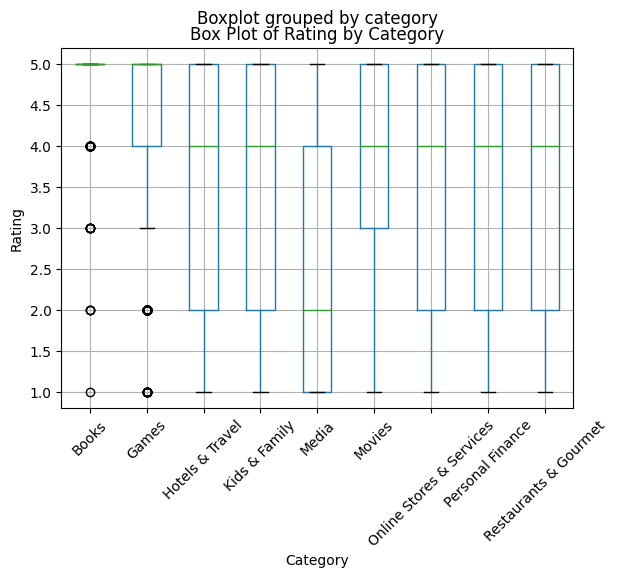

In [12]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

boxplot = df.boxplot(column='rating', by='category')

plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Box Plot of Rating by Category')

plt.xticks(rotation=45)


Category seems to have a relation with ratings. Media category's rating seems to be lower than the other categories. Movies tends to have higher ratings in comparison with Hotels & Travel, Kids & Family, Online Stores & Services, Personal Finance, Restaurants & Gourmet. Books and Games have the highest percentage of rating 5.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [13]:
df_cleaned = df[df['helpfulness']> 2]
len(df_cleaned)



13643

Removed the rows where helpfulness is less than or equal to 2.

In [14]:
# your code and solutions

review_count = df_cleaned['userId'].value_counts()

for userId, count in review_count.items():
    if count< 7:
      df_cleaned = df_cleaned[df_cleaned['userId']!= userId]
df_cleaned['userId'].value_counts()

6408    35
2098    29
4660    28
702     28
134     28
        ..
1683     7
8500     7
8431     7
5702     7
7286     7
Name: userId, Length: 267, dtype: int64

Removed the reviews of the users who did not review atleast 7 items.

In [15]:
item_count = df_cleaned['item_id'].value_counts()
for item_id, count in item_count.items():
  if count < 11:
    df_cleaned = df_cleaned[df_cleaned['item_id']!= item_id]
len(df_cleaned)

2685